In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')
    
    # Plot a horizontal line at y=0
    plt.axhline(0, color='black', lw=0.5)

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'logs/log.csv'
history = pd.read_csv(history, index_col=False)

history.head()

,Elapsed Time,Iteration,D/loss_real,D/loss_fake,D/loss_cls,D/loss_gp,G/loss_fake,G/loss_rec,G/loss_cls,G/loss_dom
0,0:00:06,100,-3.9529,0.0709,1.5254,0.0213,-0.1776,0.2977,1.4822,46.5392
1,0:00:11,200,-2.4833,-0.2432,1.2453,0.0155,0.3762,0.1701,1.3768,39.3612
2,0:00:15,300,-1.4717,-0.8362,1.3648,0.0106,0.7172,0.1460,1.4683,37.3503
3,0:00:19,400,-2.2442,0.3580,1.2691,0.0128,-0.3092,0.1409,1.4925,26.2671
4,0:00:24,500,-1.3498,-0.5363,1.2635,0.0073,0.4644,0.1302,1.4333,29.6091


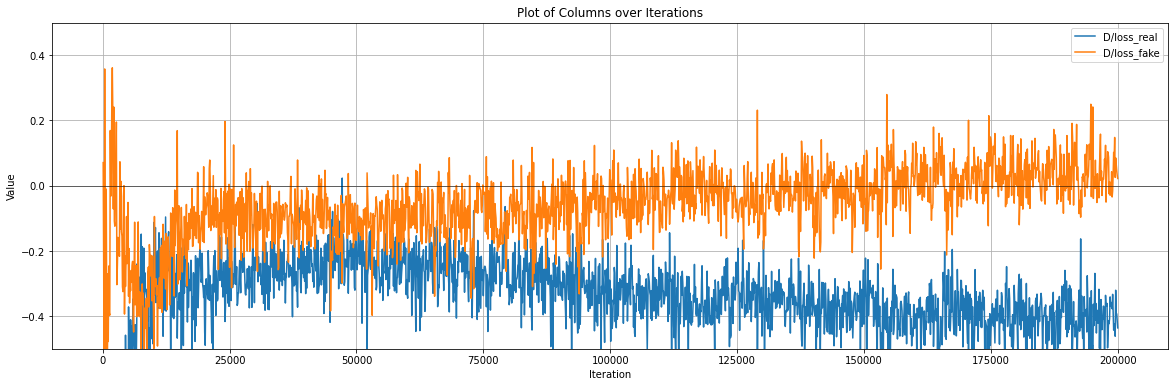

In [4]:
plot_columns(history, ['D/loss_real', 'D/loss_fake'], logaxis=False, ylim=(-0.5, 0.5))

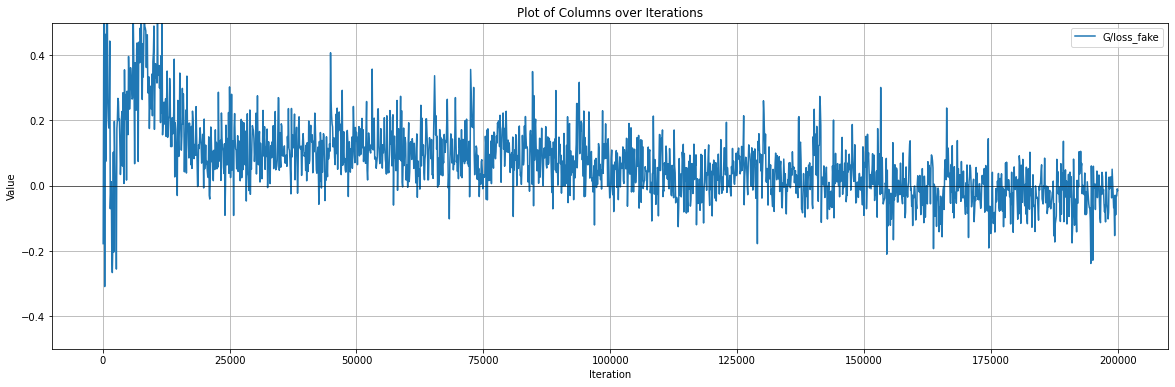

In [5]:
plot_columns(history, ['G/loss_fake'], logaxis=False, ylim=(-0.5, 0.5))

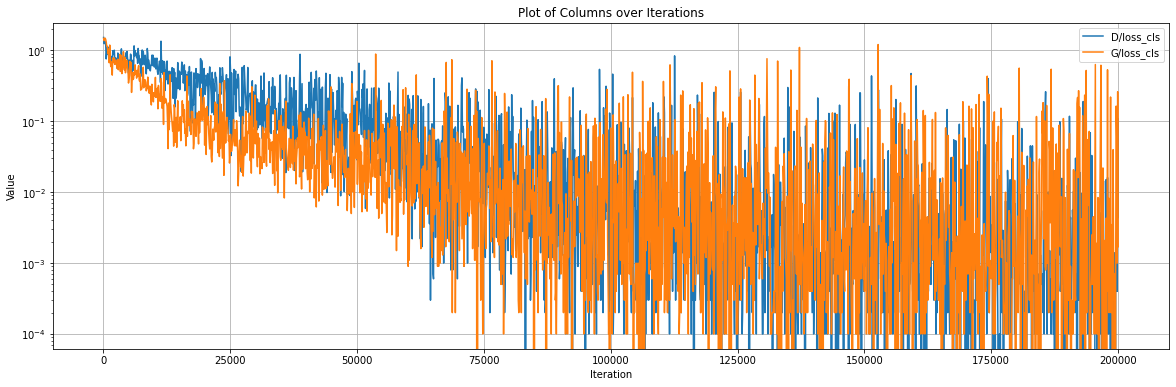

In [6]:
plot_columns(history, ['D/loss_cls', 'G/loss_cls'], logaxis=True)

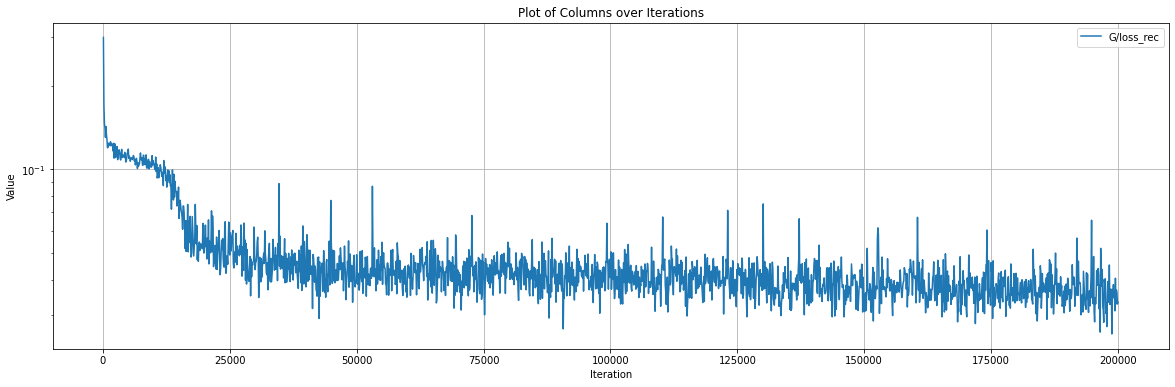

In [7]:
plot_columns(history, ['G/loss_rec'], logaxis=True)

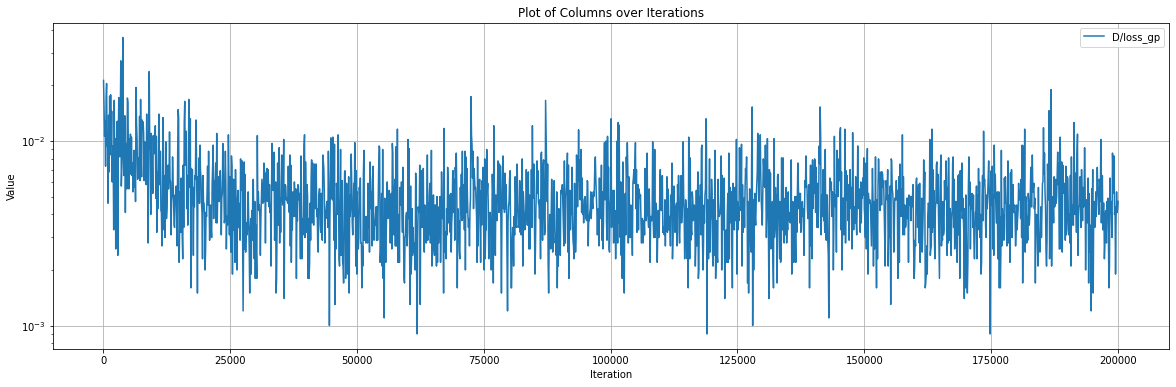

In [8]:
plot_columns(history, ['D/loss_gp'], logaxis=True)

# Metrics

## TSTR Score

In [9]:
file_path = 'results/TSTR_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,source,domain,accuracy,loss
0,20000,WAL,15,0.400000,1.679579
1,20000,WAL,16,0.648148,1.017480
2,20000,WAL,17,0.528302,1.211495
3,20000,WAL,18,0.518519,2.251203
4,20000,WAL,19,0.518519,2.994679


Maximum average accuracy: 0.6528 at step 60000


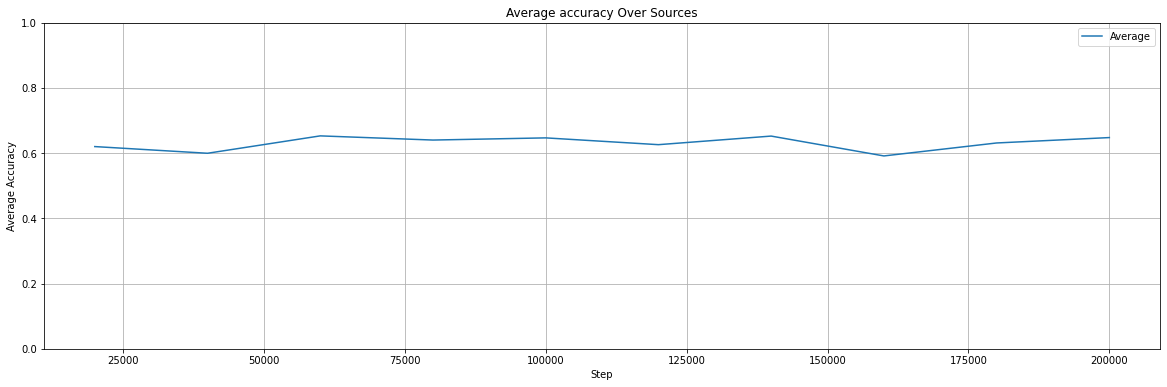

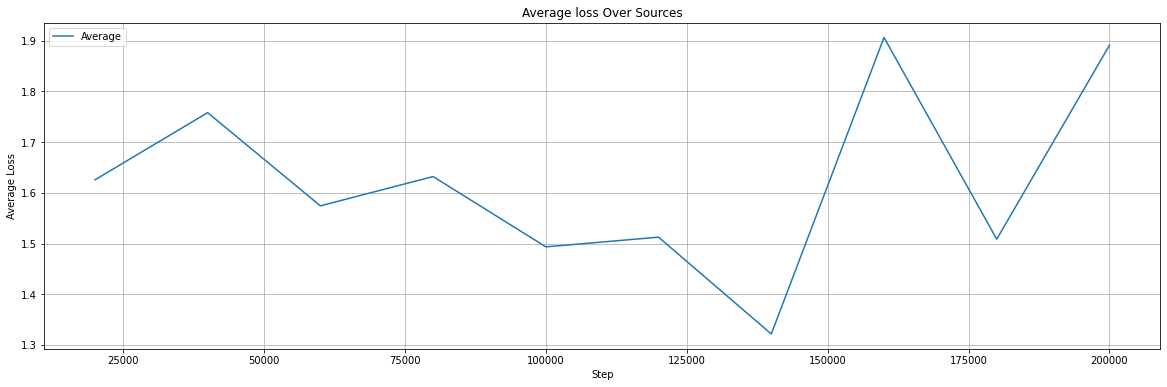

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_sources(metrics, metric, ylim=None):
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step' and then calculate the mean across 'source' and 'domain'
    mean_data = filtered_data.groupby(['step']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data[metric], label='Average')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    if metric == 'accuracy':
        # Find the maximum value of the metric and its corresponding step
        max_value = mean_data[metric].max()
        max_step = mean_data[mean_data[metric] == max_value]['step'].values[0]
        print(f'Maximum average {metric}: {max_value:.4f} at step {max_step}')

    plt.title(f'Average {metric} Over Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True) 
    plt.show()

plot_average_metric_over_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_sources(classification_scores, 'loss')

## Domain Score

In [11]:
domain_scores = pd.read_csv('results/domain_scores.csv')
domain_scores.head()

,step,source,target,accuracy,loss
0,20000,WAL,RUN,0.024329,15.209773
1,20000,WAL,CLD,0.018431,17.447721
2,20000,WAL,CLU,0.012681,11.801986
3,40000,WAL,RUN,0.010174,16.480146
4,40000,WAL,CLD,0.017104,13.883623


Maximum accuracy: 0.0198 at step 140000


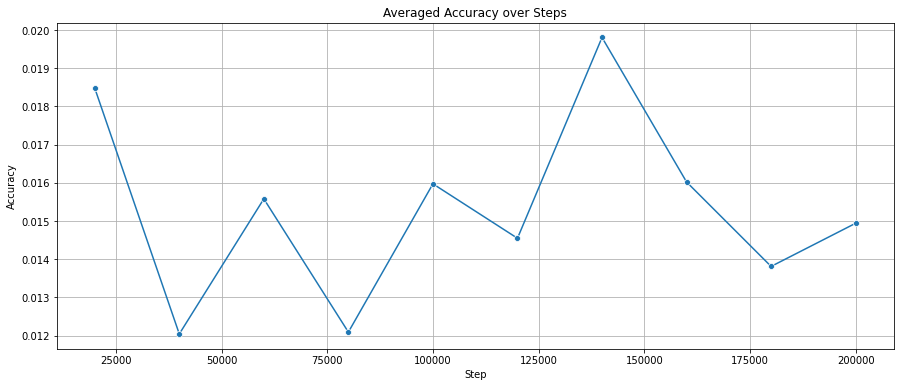

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, metric):    
    # Group by step and calculate the mean of the metric
    averaged_data = data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric}: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()


plot_metric_averaged(domain_scores, 'accuracy')

## Distance Score

In [13]:
distance_scores = pd.read_csv('results/dist_scores.csv')
distance_scores.head()

FileNotFoundError: [Errno 2] No such file or directory: 'results/dist_scores.csv'

In [ ]:
def plot_dist(data):
    # Group by 'step' and calculate the mean of 'distance'
    grouped_data = data.groupby('step')['distance'].mean().reset_index()

    min_distance = grouped_data['distance'].min()
    min_step = grouped_data[grouped_data['distance'] == min_distance]['step'].values[0]
    print(f'Minimum distance: {min_distance:.4f} at step {min_step}')
    
    # Plot the data
    plt.figure(figsize=(15, 6))
    plt.plot(grouped_data['step'], grouped_data['distance'], marker='o')
    plt.xlabel('Step')
    plt.ylabel('Average Distance')
    plt.title(f'Average Distance over Steps')
    plt.grid(True)
    plt.show()

plot_dist(distance_scores)